# **Emotion Analysis**

## Veri Setini Yükleme

In [3]:
!pip install -q datasets

In [4]:
from datasets import load_dataset

In [5]:
emotions = load_dataset("dair-ai/emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1454: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings

### Veri Setini Anlama

In [6]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
len(train_ds)

16000

In [9]:
train_ds[1] # test verisindeki 1. index

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

In [10]:
train_ds.column_names

['text', 'label']

In [11]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [12]:
train_ds[:5] # ilk 5 satır degerleri ve etiketleri

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

### Verileri Pandasa Çevirme

In [13]:
import pandas as pd

In [14]:
emotions.set_format(type="pandas")

In [15]:
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [16]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

In [17]:
df["label_name"] = df["label"].apply(label_int2str)

In [18]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Veri Görselleştirme

In [19]:
import matplotlib as plt

AttributeError: module 'matplotlib' has no attribute 'title'

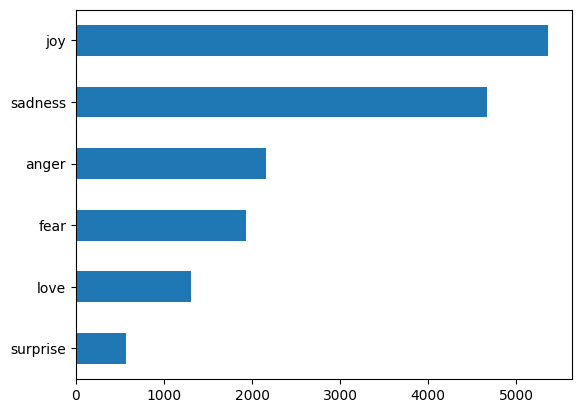

In [20]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

AttributeError: module 'matplotlib' has no attribute 'suptitle'

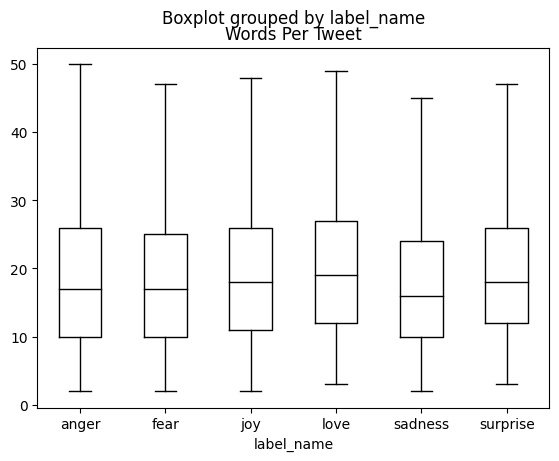

In [21]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [50]:
emotions.reset_format()

## Veri Ön İşleme ( Tokenization )

### Character Tokenization

In [22]:
text = "It is fun to work with NLP using HuggingFace."

In [23]:
tokenized_text = list(text)

In [24]:
print(tokenized_text)

['I', 't', ' ', 'i', 's', ' ', 'f', 'u', 'n', ' ', 't', 'o', ' ', 'w', 'o', 'r', 'k', ' ', 'w', 'i', 't', 'h', ' ', 'N', 'L', 'P', ' ', 'u', 's', 'i', 'n', 'g', ' ', 'H', 'u', 'g', 'g', 'i', 'n', 'g', 'F', 'a', 'c', 'e', '.']


In [25]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'F': 2, 'H': 3, 'I': 4, 'L': 5, 'N': 6, 'P': 7, 'a': 8, 'c': 9, 'e': 10, 'f': 11, 'g': 12, 'h': 13, 'i': 14, 'k': 15, 'n': 16, 'o': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'w': 22}


In [26]:
input_ids = [token2idx[token] for token in tokenized_text ]
print(input_ids)

[4, 20, 0, 14, 19, 0, 11, 21, 16, 0, 20, 17, 0, 22, 17, 18, 15, 0, 22, 14, 20, 13, 0, 6, 5, 7, 0, 21, 19, 14, 16, 12, 0, 3, 21, 12, 12, 14, 16, 12, 2, 8, 9, 10, 1]


In [27]:
df = pd.DataFrame({"name" : ["semih", "baris" , "emre"],
                   "label": [0,1,2]})
df

,name,label
0,semih,0
1,baris,1
2,emre,2


In [28]:
pd.get_dummies(df)

,label,name_baris,name_emre,name_semih
0,0,0,0,1
1,1,1,0,0
2,2,0,1,0


In [29]:
import torch

In [30]:
input_ids = torch.tensor(input_ids)

In [31]:
import torch.nn.functional as F

In [32]:
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))

In [33]:
one_hot_encodings.shape # girdi , uzunluk

torch.Size([45, 23])

In [34]:
print(f"Token: {tokenized_text[0]}")

Token: I


In [35]:
print("Tensor Index:", input_ids[0])


Tensor Index: tensor(4)


In [36]:
print(f"One-hot: {one_hot_encodings[0]}")

One-hot: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Word Tokenization

In [37]:
tokenized_text = text.split()
print(tokenized_text)

['It', 'is', 'fun', 'to', 'work', 'with', 'NLP', 'using', 'HuggingFace.']


In [38]:
from transformers import AutoTokenizer

In [39]:
model_ckpt = "distilbert-base-uncased"

In [40]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [41]:
from transformers import DistilBertTokenizer

In [42]:
distilber_tokenize = DistilBertTokenizer.from_pretrained(model_ckpt)

In [43]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2009, 2003, 4569, 2000, 2147, 2007, 17953, 2361, 2478, 17662, 12172, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [44]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'it', 'is', 'fun', 'to', 'work', 'with', 'nl', '##p', 'using', 'hugging', '##face', '.', '[SEP]']


In [45]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] it is fun to work with nlp using huggingface. [SEP]'

In [46]:
tokenizer.vocab_size

30522

In [47]:
tokenizer.model_max_length

512

In [48]:
def tokenize(batch):
  return tokenizer(batch["text"], truncation=True)

In [51]:
tokenize(emotions["train"][:2])


{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [52]:
emotions_encoded = emotions.map(tokenize, batched = True, batch_size = None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [53]:
from transformers import DataCollatorWithPadding

In [54]:
data_collator = DataCollatorWithPadding(tokenizer = tokenizer)

In [55]:
emotions_encoded["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']

## Model Loading

In [56]:
from transformers import AutoModelForSequenceClassification

In [57]:
num_labels = 6

In [58]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )

In [59]:
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,
                                                           num_labels = num_labels).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.weight', 'pre_classifier.we

### Evulation

In [60]:
!pip install -q evaluate

In [61]:
import evaluate

In [62]:
accuracy = evaluate.load("accuracy")

In [63]:
import numpy as np

In [79]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions,
                           references = labels)

### Model Sharing

In [65]:
from huggingface_hub import notebook_login

In [66]:
notebook_login()

### Training Arguments

In [ ]:
!pip install datasets transformers==4.28.0

In [71]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="distilbert-emotion",
    num_train_epochs = 2,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy = "epoch",
    load_best_model_at_end = True,
    push_to_hub = True,
    report_to = "none"
)

In [68]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = emotions_encoded["train"],
    eval_dataset = emotions_encoded["validation"],
    tokenizer = tokenizer,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
Cloning https://huggingface.co/ocaklisemih/distilbert-emotion into local empty directory.


In [80]:
trainer.train()

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss


ValueError: Predictions and/or references don't match the expected format.
Expected format: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)},
Input predictions: [[ 5.7634497  -1.011602   -1.2157595  -0.86179996 -1.2662458  -1.9153167 ]
 [ 5.791092   -0.982446   -1.7539715  -0.44331986 -0.90764296 -2.0848606 ]
 [-1.765631    2.6974652   3.6150844  -1.7075725  -2.323538   -1.9693635 ]
 ...
 [-1.706502    5.908193   -0.21705748 -1.6653287  -1.9069551  -1.1999091 ]
 [-2.2283707   3.2143326   3.3595374  -1.8736335  -2.2290251  -1.8787885 ]
 [-1.8275579   6.053012   -0.24738348 -1.9292512  -1.784723   -0.8768852 ]],
Input references: [0 0 2 ... 1 1 1]

## Model Evaluation

### Predicting the validation dataset

In [ ]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [ ]:
preds_output.metrics

### Confusion Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(preds_output.predictions, axis=1)

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize = "true")
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels=labels)
    disp.plot(cmap="Blues", values_format = ".2f", ax = ax,
             colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

In [ ]:
y_valid = np.array(emotions_encoded["validation"]["label"])
labels = emotions["train"].features["label"].names

In [ ]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [ ]:
trainer.push_to_hub(commit_message="Training completed!")